In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [3]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   bool  
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

,missing_value,%
edible,0,0.00
cap_shape,0,0.00
cap_surface,0,0.00
cap_color,0,0.00
bruises,0,0.00
odor,0,0.00
gill_attachment,0,0.00
gill_spacing,0,0.00
gill_size,0,0.00
gill_color,0,0.00


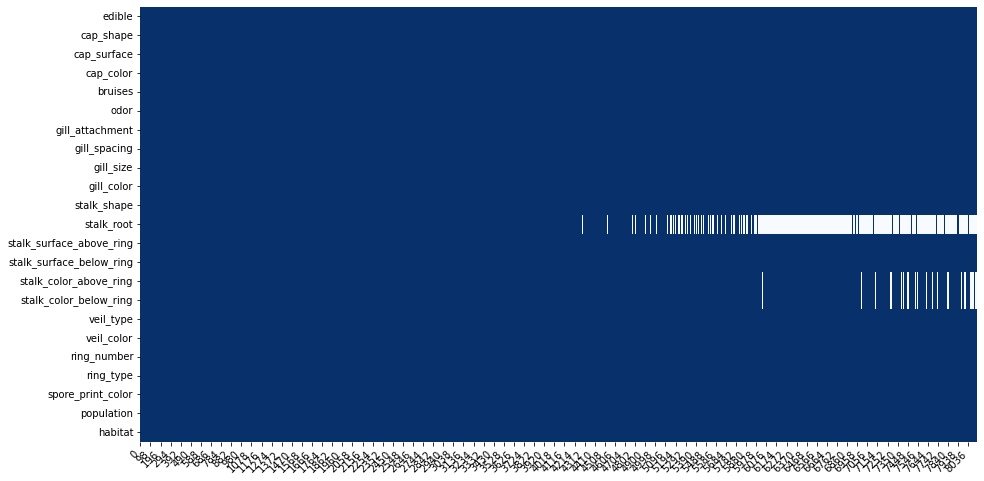

In [3]:
plot_missing_value(df, return_df=True)

In [4]:
df.drop(columns='stalk_root', inplace=True)

In [6]:
df.edible.value_counts()

True     4208
False    3916
Name: edible, dtype: int64

# Association Matrix

In [7]:
from jcopml.plot import plot_association_matrix

In [11]:
plot_association_matrix(df, 'edible', categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

Kita bisa lihat bahwa proficinecy bahwa odor sangat menentukan apakah suatu jamur edible atau tidak ***U(X|Y)*** = 0,9 tapi bukan berarti sebaliknya ***U(Y|X)*** = 0,4

In [10]:
df.drop(columns='veil_type', inplace=True)

# Dataset Splitting

In [13]:
X = df[['odor','gill_color','ring_type','spore_print_color']]
y = df.edible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 4), (1625, 4), (6499,), (1625,))

# Training

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 972 to 731
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   odor               6499 non-null   object
 1   gill_color         6499 non-null   object
 2   ring_type          6499 non-null   object
 3   spore_print_color  6499 non-null   object
dtypes: object(4)
memory usage: 253.9+ KB


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [5]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), X_train.columns),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

NameError: name 'ColumnTransformer' is not defined

# Evaluation

In [3]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve, plot_pr_curve

In [2]:
pip install jcopml

  Using cached jcopml-1.2.2.tar.gz (21 kB)
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)

  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32196 sha256=57861fd80847900778c60380ce92d04c8b98493b9630f1436b0abd562f99f1ec
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\5e\06\58\749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


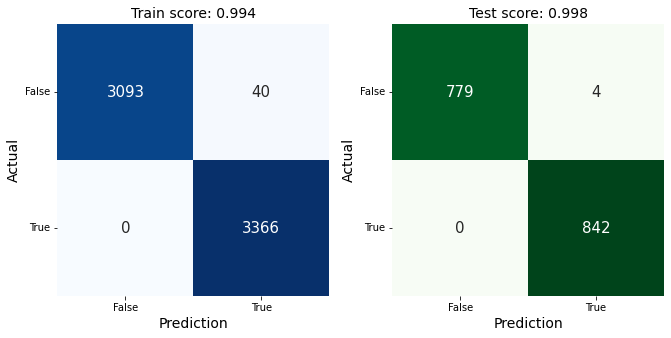

In [19]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [20]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



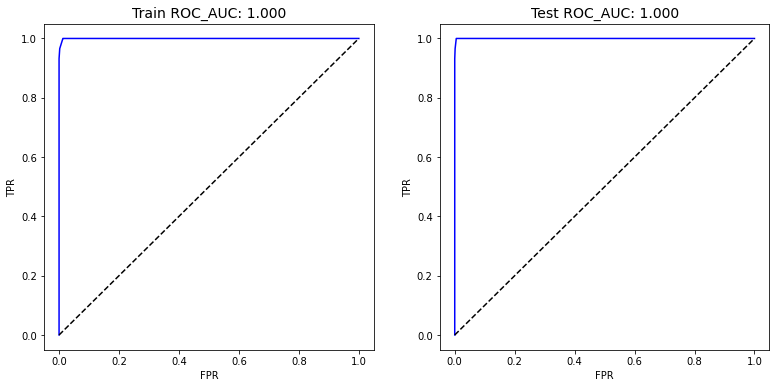

In [22]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

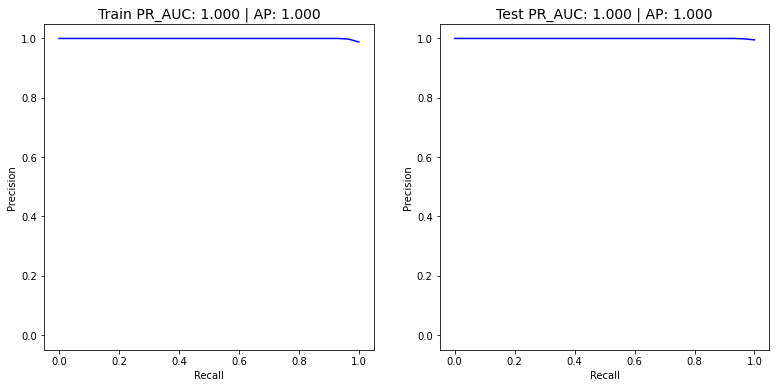

In [23]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

# Future Importance

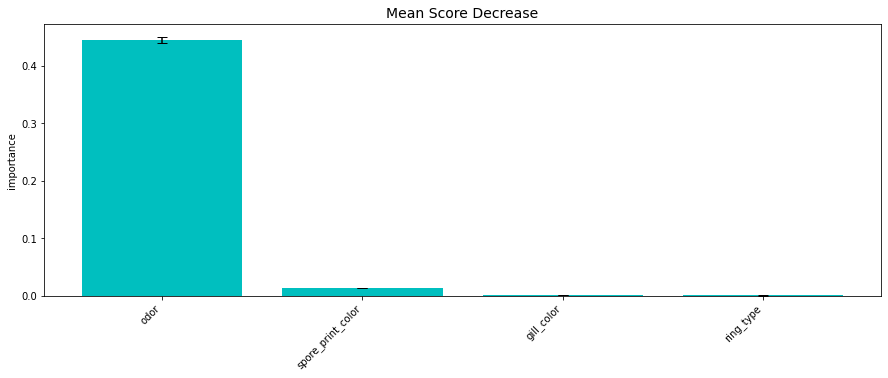

In [24]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

### Insight Melalui Data

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

<AxesSubplot:xlabel='ring_type', ylabel='count'>

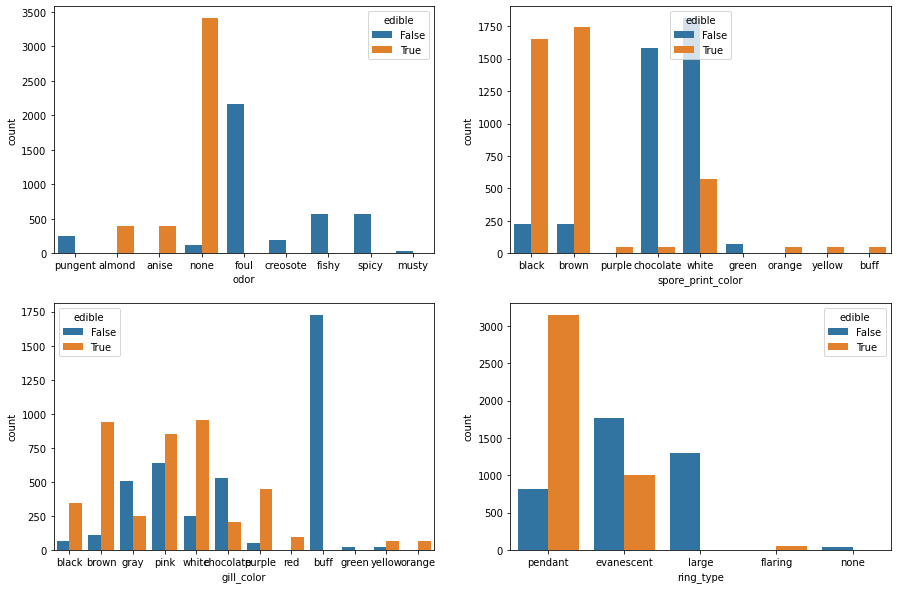

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot('odor', data=df, hue='edible')
plt.subplot(222)
sns.countplot('spore_print_color', data=df, hue='edible')
plt.subplot(223)
sns.countplot('gill_color', data=df, hue='edible')
plt.subplot(224)
sns.countplot('ring_type', data=df, hue='edible')

# Correlation Ratio

In [29]:
from jcopml.plot import plot_correlation_ratio

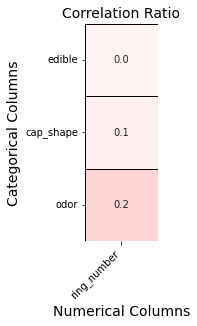

In [30]:
df_corrat = plot_correlation_ratio(df, ['edible','cap_shape','odor'], ['ring_number'], report=True)